In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Change path as needed
happiness_report = pd.read_csv("world-happiness-report-2015-2022-cleaned.csv")
happiness_report

,Unnamed: 0,Happiness Rank,Country,Region,Happiness Score,Economy (GDP per Capita),Family (Social Support),Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
0,0,1,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,1,2,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,2,3,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,3,4,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,4,5,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1078,144,145,Lesotho,Sub-Saharan Africa,3.512,0.45100,0.73100,0.00700,0.40500,0.01500,0.10300,2021
1079,145,146,Botswana,Sub-Saharan Africa,3.467,1.09900,0.72400,0.34000,0.53900,0.08800,0.02700,2021
1080,146,147,Rwanda,Sub-Saharan Africa,3.415,0.36400,0.20200,0.40700,0.62700,0.49300,0.22700,2021
1081,147,148,Zimbabwe,Sub-Saharan Africa,3.145,0.45700,0.64900,0.24300,0.35900,0.07500,0.15700,2021


In [3]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Economy (GDP per Capita)",
                      "Family (Social Support)", 
                      "Health (Life Expectancy)", 
                      "Freedom", "Trust (Government Corruption)", 
                      "Generosity"]),
    (OneHotEncoder(handle_unknown="ignore"), ["Region"])
)

# create input and output
x = happiness_report.drop(["Happiness Rank", "Country", "Happiness Score", "Year"], axis=1)
y = happiness_report["Happiness Score"]

# Create train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

ct.fit(x_train)

# Transform training and test data with normalization and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [4]:
# Build a neural network
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

history = model.fit(x_train_normal, y_train, epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 7ms/step - loss: 3.1286 - mae: 3.1286
Epoch 2/100
28/28 [==============================] - 0s 5ms/step - loss: 0.5965 - mae: 0.5965
Epoch 3/100
28/28 [==============================] - 0s 4ms/step - loss: 0.4285 - mae: 0.4285
Epoch 4/100
28/28 [==============================] - 0s 7ms/step - loss: 0.4061 - mae: 0.4061
Epoch 5/100
28/28 [==============================] - 0s 4ms/step - loss: 0.3979 - mae: 0.3979
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3947 - mae: 0.3947
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.3959 - mae: 0.3959
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3945 - mae: 0.3945
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3883 - mae: 0.3883
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3843 - mae: 0.3843
Epoch 11/100
28/28 [==============================] - 0s 2m

In [5]:
model.evaluate(x_test_normal, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4483 - mae: 0.4483


[0.4483257532119751, 0.4483257532119751]

Text(0.5, 0, 'epochs')

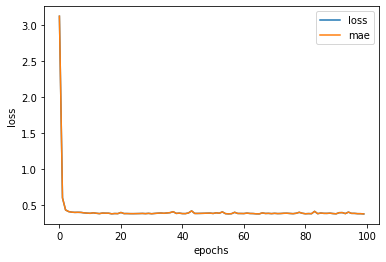

In [6]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [8]:
# Boston pricing model
(xB_train, yB_train), (xB_test, yB_test) = tf.keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=42
)

In [12]:
# Build a model
Boston_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

Boston_model.compile(loss=tf.keras.losses.mae,
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=["mae"])

history = Boston_model.fit(xB_train, yB_train, epochs=100, verbose=0)

In [13]:
Boston_model.evaluate(xB_test, yB_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.8262 - mae: 3.8262


[3.826162576675415, 3.826162576675415]

Text(0.5, 0, 'epochs')

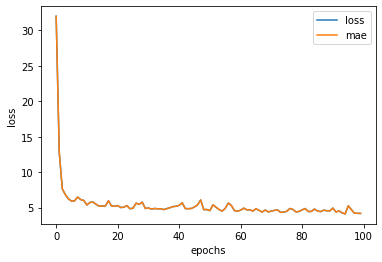

In [14]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")